# Import packages


To download an install \texttt{cosmocnc}, see [github.com/inigozubeldia/cosmocnc](https://github.com/inigozubeldia/cosmocnc/tree/main).

To download and install \texttt{class\_sz} see [github.com/CLASS-SZ/class_sz](https://github.com/CLASS-SZ/class_sz).

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cosmocnc as cosmocnc

2024-03-14 23:36:47.099126: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-14 23:36:47.099146: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-14 23:36:47.099152: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-14 23:36:47.099181: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 23:36:47.099198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
cosmocnc.__file__

'/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/__init__.py'

In [4]:
import classy_sz
from classy_sz import Class
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

# Number counts calculations for a Simons Observatory like experiment

## cnc with internal halo mass function

In [5]:
number_counts = cosmocnc.cluster_number_counts()
number_counts.cnc_params.update(
{
"path_to_cosmopower_organization" : "/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/",
"compute_abundance_matrix" : True,
"cluster_catalogue" : "SO_sim_" + str(0),
"observables" : [["q_so_sim"]],
"obs_select" : "q_so_sim",
"data_lik_from_abundance" : True,
"number_cores_hmf" : 1,
"number_cores_abundance" : 8,
"number_cores_data" : 16,
"obs_select_min" : 5.,
"obs_select_max" : 200.,

"parallelise_type" : "redshift",
"scalrel_type_deriv" : "numerical",

"z_max" : 3.,
"z_min" : 0.01,
"n_z" : 5000,

"M_min" : 1e13,
"M_max" : 1e16,
"n_points" : 1024*32, #64*4#2**13, ##number of points in which the mass function at each redshift (and all the convolutions) is evaluated

"apply_obs_cutoff" : False,
    
'cosmology_tool' : "classy_sz",
    
    
"class_sz_ndim_redshifts" : 500,
"class_sz_ndim_masses" : 100,  # when using cosmopower this is automatically fixed. 
"class_sz_concentration_parameter" : "B13",
"class_sz_hmf": "T08M500x", 
"hmf_calc": "cnc",#or "classy_sz"
})
number_counts.scal_rel_params.update(
{
"dof" : 0.,
"bias_sz" : 0.8,
}
)

number_counts.cosmo_params.update(
{
'h':0.7,
}
)

In [6]:
number_counts.initialise()
number_counts.get_number_counts()

Total clusters 15004.063054539756


In [7]:
dndz = number_counts.n_z
dndq = number_counts.n_obs
cnc_zs = number_counts.redshift_vec
cnc_qs = number_counts.obs_select_vec

## cosmocnc with class_sz halo mass function

In [8]:
number_counts = cosmocnc.cluster_number_counts()
number_counts.cnc_params.update(
{
"path_to_cosmopower_organization" : "/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization/",
"compute_abundance_matrix" : True,
"cluster_catalogue" : "SO_sim_" + str(0),
"observables" : [["q_so_sim"]],
"obs_select" : "q_so_sim",
"data_lik_from_abundance" : True,
"number_cores_hmf" : 1,
"number_cores_abundance" : 8,
"number_cores_data" : 16,
"obs_select_min" : 5.,
"obs_select_max" : 200.,

"parallelise_type" : "redshift",
"scalrel_type_deriv" : "numerical",

"z_max" : 3.,
"z_min" : 0.01,
"n_z" : 5000,

"M_min" : 1e13,
"M_max" : 1e16,
"n_points" : 1024*32, #64*4#2**13, ##number of points in which the mass function at each redshift (and all the convolutions) is evaluated

"apply_obs_cutoff" : False,
    
'cosmology_tool' : "classy_sz",
    
    
"class_sz_ndim_redshifts" : 500,
"class_sz_ndim_masses" : 100,  # when using cosmopower this is automatically fixed. 
"class_sz_concentration_parameter" : "B13",
"class_sz_hmf": "M500", 
"hmf_calc": "classy_sz"
})
number_counts.scal_rel_params.update(
{
"dof" : 0.,
"bias_sz" : 0.8,
}
)

number_counts.cosmo_params.update(
{
'h':0.7,
}
)

In [9]:
number_counts.initialise()
number_counts.get_number_counts()

Total clusters 14990.401831622947


In [10]:
dndz_class_sz_hmf = number_counts.n_z
dndq_class_sz_hmf = number_counts.n_obs
cnc_zs_class_sz_hmf = number_counts.redshift_vec
cnc_qs_class_sz_hmf = number_counts.obs_select_vec

## class_sz calculation

### reformatting of the noise file for class_sz

In [11]:
theta_500_vec,sigma_sz_vec = np.load("../data/so_sim_sz_mf_noise.npy")
theta_500_vec = theta_500_vec*180.*60./np.pi
x = np.log(theta_500_vec)
y = np.log(sigma_sz_vec)
sigma_sz_poly = np.polyfit(x,y,deg=3)
sigma_sz_polyder = np.polyder(sigma_sz_poly)

In [12]:
theta_min = 0.001
theta_max = 100.
ntheta = 5000
theta_new = np.geomspace(theta_min,theta_max,ntheta)
sigma_new = np.exp(np.polyval(sigma_sz_poly,np.log(theta_new)))
theta_new,sigma_new

(array([1.00000000e-03, 1.00230570e-03, 1.00461672e-03, ...,
        9.95404500e+01, 9.97699604e+01, 1.00000000e+02]),
 array([2.06988018e+21, 1.98430884e+21, 1.90231220e+21, ...,
        2.39807414e-06, 2.39448283e-06, 2.39088924e-06]))

[]

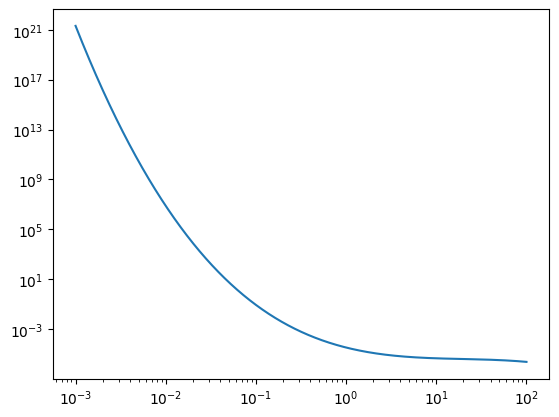

In [13]:
plt.plot(theta_new,sigma_new)
plt.loglog()

In [14]:
np.savetxt("../data/so_sim_sz_mf_noise_skyfracs.txt",np.c_[[0.4]])
np.savetxt("../data/so_sim_sz_mf_noise_sigmas.txt",np.c_[sigma_new])
np.savetxt("../data/so_sim_sz_mf_noise_thetas.txt",np.c_[theta_new])

### compute

In [15]:
%%time
cnc_classy_sz = Class()


szcounts_param ={
'output': 'sz_cluster_counts_fft,m500c_to_m200c,m200c_to_m500',
    
"concentration parameter" :  number_counts.cnc_params["class_sz_concentration_parameter"],    

'mass function'  : number_counts.cnc_params["class_sz_hmf"],
    
'omega_b': number_counts.cosmo_params['Ob0h2'],
'omega_cdm':  number_counts.cosmo_params['Oc0h2'],
'h': number_counts.cosmo_params['h'],
'sigma8': number_counts.cosmo_params['sigma_8'],
'n_s': number_counts.cosmo_params['n_s'],
'tau_reio': 0.06,
    
    
'B': 1./number_counts.scal_rel_params['bias_sz'],
    
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'T_ncdm' : 0.71611,
# 'z_min': 0.,
# 'z_max': 2.,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,    
    

    
'M_min': number_counts.cnc_params['M_min']*number_counts.cosmo_params['h']*0.8,
'M_max': number_counts.cnc_params['M_max']*number_counts.cosmo_params['h']*1.2,
    
    
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,
    
'ndim_redshifts': 5000,#number_counts.cnc_params["class_sz_ndim_redshifts"], 
'ndim_masses' : number_counts.cnc_params["class_sz_ndim_masses"],
'szcounts_fft_nz' : 585,
'n_m_dndlnM' : 8000,


    
'has_selection_function' : 1,
'experiment' : 1, # Planck: 0 / ACT or SO: 1
'y_m_relation' : 1, # ycenter : 1, # y500 : 0
'signal-to-noise_cut-off_for_survey_cluster_completeness' : number_counts.cnc_params['obs_select_min'],

'sz_selection_function_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/data/so_sim_sz_mf_noise_thetas.txt',
'sz_selection_function_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/data/so_sim_sz_mf_noise_skyfracs.txt',
'sz_selection_function_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/data/so_sim_sz_mf_noise_sigmas.txt',    


    
    
'A_ym'  : 10**number_counts.scal_rel_params['A_szifi'],
'B_ym'  : number_counts.scal_rel_params['alpha_szifi']-1.,
'C_ym' : 0.,
'sigmaM_ym' : number_counts.scal_rel_params['sigma_lnq_szifi'],
'm_pivot_ym_[Msun]' : 3e14,

'use_m500c_in_ym_relation' : 1,
'use_m200c_in_ym_relation' : 0,
'use_skyaveraged_noise': 0, # this will speed-up everything
    
    
# 'N_samp_fftw' : 2**12,
'N_samp_fftw' : 1600*4,

'szcounts_fft_nz' : 550,

'z_min' : 0.8*number_counts.cnc_params['z_min'],
'z_max' : 1.2*number_counts.cnc_params['z_max'],
    
'szcounts_fft_z_min' :0.8*number_counts.cnc_params['z_min'],
'szcounts_fft_z_max' :1.2*number_counts.cnc_params['z_max'],
    
    
    
'tol_dlnm_dlnq':0.001,
'ntab_dlnm_dlnq':1000, # fiducial 1000

'szcounts_qmax_fft_padded':500.,
    
'sigma_derivative' : 0,
'szcc_dof': 0.,
'szcc_qtrunc':-1.,

    
'HMF_prescription_NCDM': 1,
'no_spline_in_tinker': 1,
        }
cnc_classy_sz.set(szcounts_param)
        
cnc_classy_sz.compute_class_szfast()

CPU times: user 7min 43s, sys: 13.6 s, total: 7min 57s
Wall time: 1min 17s


In [16]:
zmin = number_counts.cnc_params['z_min']
zmax = number_counts.cnc_params['z_max']
nz = szcounts_param['szcounts_fft_nz']
z_arr = np.linspace(zmin,zmax,nz)

q_threshold = number_counts.cnc_params['obs_select_min']
q_max = 200.
nq = 5000
q_arr = np.geomspace(q_threshold, q_max,nq)

In [17]:
dq = (q_max-q_threshold)/(nq-1.)
dz = (zmax - zmin)/(nz-1.)

In [18]:
get_dndzdq = np.vectorize(cnc_classy_sz.get_szcounts_dndzdq_at_z_q)

In [19]:
import scipy.integrate as integrate
Nz = []
for zp in z_arr:
    Nz.append(integrate.simps(get_dndzdq(zp,q_arr),q_arr,axis=0))
Nz = np.asarray(Nz)

Nq = []
for qp in q_arr:
    # Nq.append(np.trapz(get_dndzdq(z_arr,qp),x=z_arr))
    Nq.append(integrate.simps(get_dndzdq(z_arr,qp),z_arr,axis=0))
Nq = np.asarray(Nq)

In [21]:
Ntot = np.trapz(Nz,x=z_arr)
Ntot

15003.57501060681

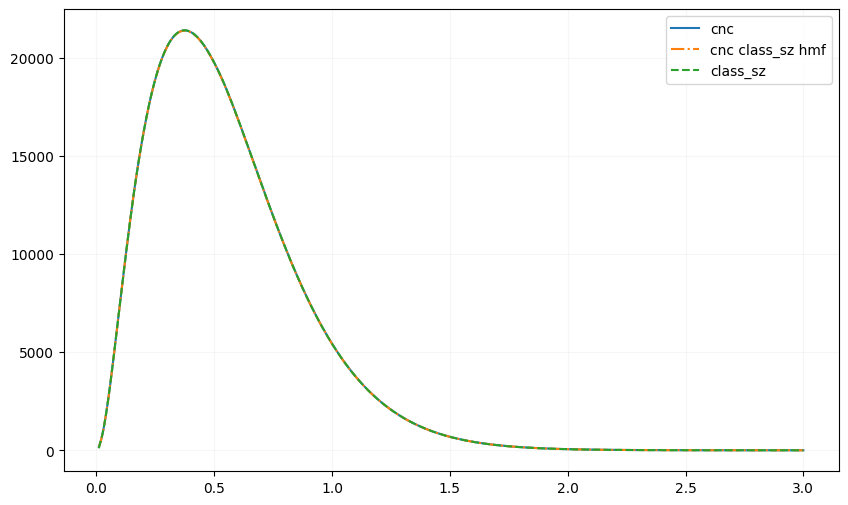

In [22]:
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(cnc_zs,dndz,label="cnc")
ax.plot(cnc_zs_class_sz_hmf,dndz_class_sz_hmf,label="cnc class_sz hmf",ls='-.')
ax.plot(z_arr,Nz,label='class_sz',ls='--')

plt.grid(which="both",alpha=0.1)
plt.legend()

(0.0, 2.0)

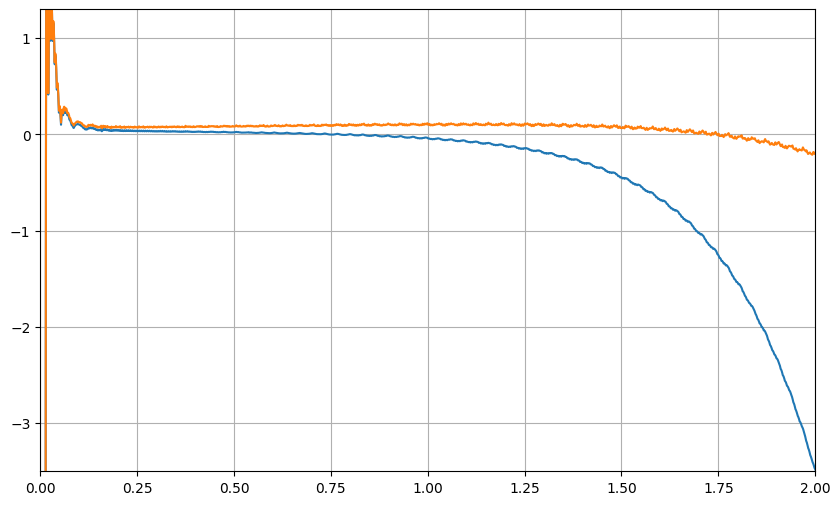

In [23]:

fig,ax = plt.subplots(figsize=(10,6))

class_sz_nz_interp = np.interp(cnc_zs,z_arr,Nz)
ax.plot(cnc_zs,100.*(class_sz_nz_interp/dndz-1.))
ax.plot(cnc_zs_class_sz_hmf,100.*(class_sz_nz_interp/dndz_class_sz_hmf-1.))

plt.grid(which='both')
ax.set_ylim(-3.5,1.3)
ax.set_xlim(0.,2.)

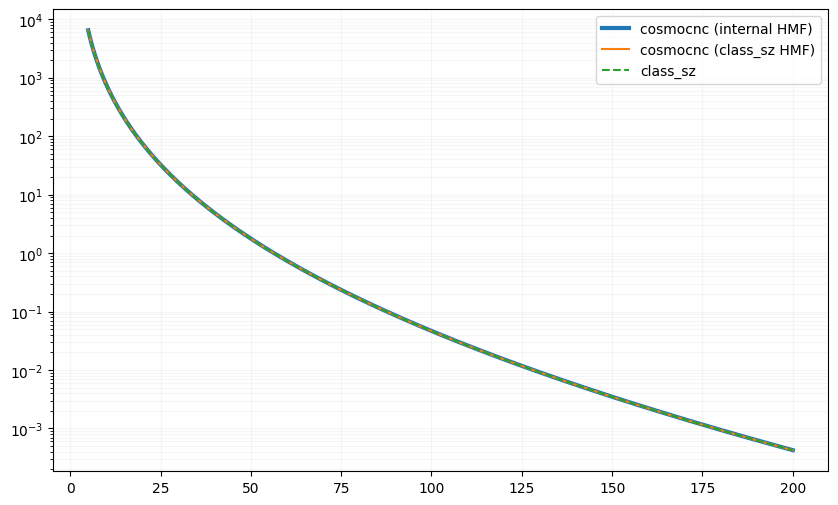

In [24]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(cnc_qs,dndq,lw=3.,label="cosmocnc (internal HMF)")
ax.plot(cnc_qs_class_sz_hmf,dndq_class_sz_hmf,label="cosmocnc (class_sz HMF)")
ax.plot(q_arr,Nq,label='class_sz',ls='--')
ax.set_yscale("log")
plt.grid(which="both",alpha=0.1)
plt.legend()

(5.0, 100.0)

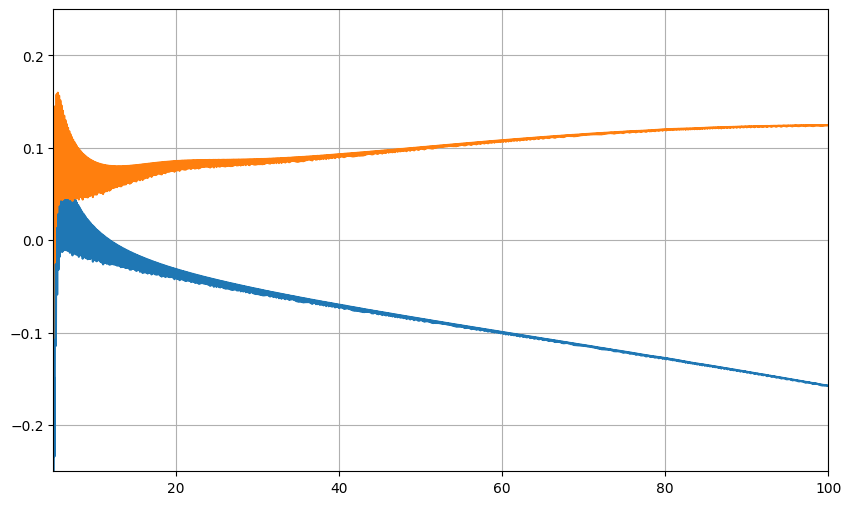

In [25]:

fig,ax = plt.subplots(figsize=(10,6))

class_sz_nq_interp = np.interp(cnc_qs,q_arr,Nq)
ax.plot(cnc_qs,100.*(class_sz_nq_interp/dndq-1.))
ax.plot(cnc_qs_class_sz_hmf,100.*(class_sz_nq_interp/dndq_class_sz_hmf-1.))

plt.grid(which='both')
ax.set_ylim(-0.25,0.25)
ax.set_xlim(5.,100.)

## Binned plot

In [26]:
%%time
from classy_sz import Class

cnc_classy_sz_binned = Class()
        
szcounts_param_binned = szcounts_param.copy()
szcounts_param_binned.update({
'output': 'sz_cluster_counts,m500c_to_m200c,m200c_to_m500',
'bin_z_min_cluster_counts' : 0.01,
'bin_z_max_cluster_counts' : 2.01,
'bin_dz_cluster_counts' : 0.1,

'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,


'dlny' : 0.025,
'lnymin' : -20., # planck  -11.5 so/act -11
'lnymax' : 10.,  # planck 10. so/act -5
'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.4,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.,

'dz_cluster_count_completeness_grid_low_z' : 1e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-3,
'dz_cluster_count_completeness_grid_high_z' : 1e-2,
})

cnc_classy_sz_binned.set(szcounts_param_binned)
cnc_classy_sz_binned.compute_class_szfast()

CPU times: user 9min 47s, sys: 12.3 s, total: 9min 59s
Wall time: 1min 25s


In [27]:
dNdzdy_theoretical = cnc_classy_sz_binned.dndzdy_theoretical()['dndzdy']
z_center = cnc_classy_sz_binned.dndzdy_theoretical()['z_center']
z_edges = cnc_classy_sz_binned.dndzdy_theoretical()['z_edges']
log10y_center = cnc_classy_sz_binned.dndzdy_theoretical()['log10y_center']
log10y_edges = cnc_classy_sz_binned.dndzdy_theoretical()['log10y_edges']

N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz][0:]))
N_clusters_y_theory = []

for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    
# print total number of clusters: 
np.sum(N_clusters_z_theory)

14983.750303265477

In [28]:
z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    Nz_in = []
    for zpbin in z_arr_bin:
        Nz_in.append(np.trapz(get_dndzdq(zpbin,q_arr)*q_arr,x=np.log(q_arr)))
    Nz_binned.append(np.trapz(Nz_in,x=z_arr_bin))
Nz_binned = np.asarray(Nz_binned)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    Nq_in = []
    for qpbin in q_arr_bin:
        if 10.**qpbin<q_threshold:
            Nq_in.append(0.)
        else:
            Nq_in.append(np.trapz(get_dndzdq(z_arr,10**qpbin),x=z_arr))
    Nq_binned.append(np.trapz(Nq_in,x=10**q_arr_bin))
Nq_binned = np.asarray(Nq_binned)

In [29]:
from scipy import interpolate
z_edges_low = z_edges[:-1]
z_edges_high = z_edges[1:]
Nz_binned_cnc = []
for (zm,zp) in zip(z_edges_low,z_edges_high):
    z_arr_bin = np.linspace(zm,zp,50)
    dndz_inter = interpolate.interp1d(cnc_zs,dndz,bounds_error=False,fill_value=0.)
    Nz_binned_cnc.append(np.trapz(dndz_inter(z_arr_bin),x=z_arr_bin))
Nz_binned_cnc = np.asarray(Nz_binned_cnc)

q_edges_low = log10y_edges[:-1]
q_edges_low[0] = 0.6
q_edges_high = log10y_edges[1:]
Nq_binned_cnc = []
for (qm,qp) in zip(q_edges_low,q_edges_high):
    q_arr_bin = np.linspace(qm,qp,50)
    dndq_inter = interpolate.interp1d(cnc_qs,dndq,bounds_error=False,fill_value=0.)
    Nq_binned_cnc.append(np.trapz(dndq_inter(10**q_arr_bin),x=10**q_arr_bin))
Nq_binned_cnc = np.asarray(Nq_binned_cnc)

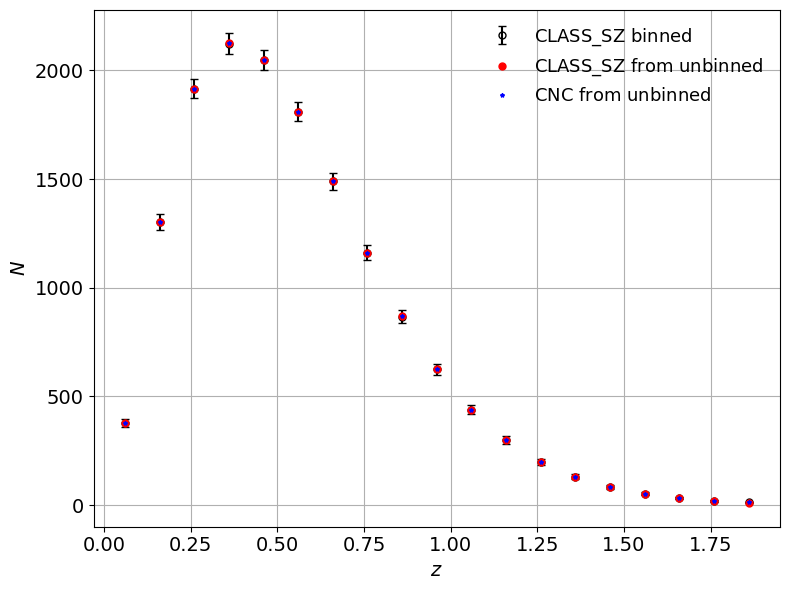

In [30]:


plt.figure(figsize=(8,6))


plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',capsize=3,c='k')
plt.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',capsize=5,c='red')


plt.errorbar(np.asarray(z_center),Nz_binned_cnc,#yerr=np.sqrt(Nz_binned),
             marker='*',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',capsize=5,c='blue')

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
# plt.loglog()
plt.show()

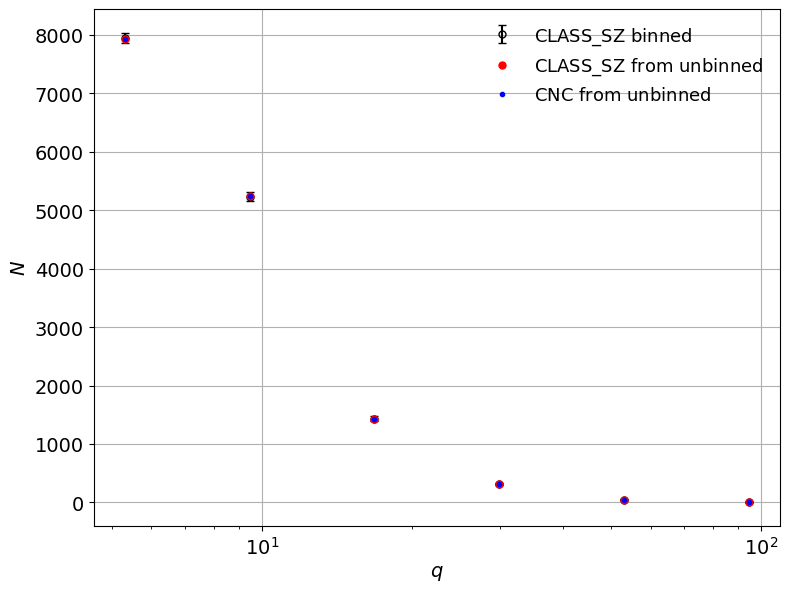

In [31]:
plt.figure(figsize=(8,6))

plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,binned}$',
             capsize=3,c='k')
plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{CLASS\_SZ\,\,from\,\,unbinned}$',
             capsize=5,c='red')

plt.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{CNC\,\,from\,\,unbinned}$',
             capsize=5,c='blue')


plt.xlabel('$q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,frameon=False)
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()

# Final Plots

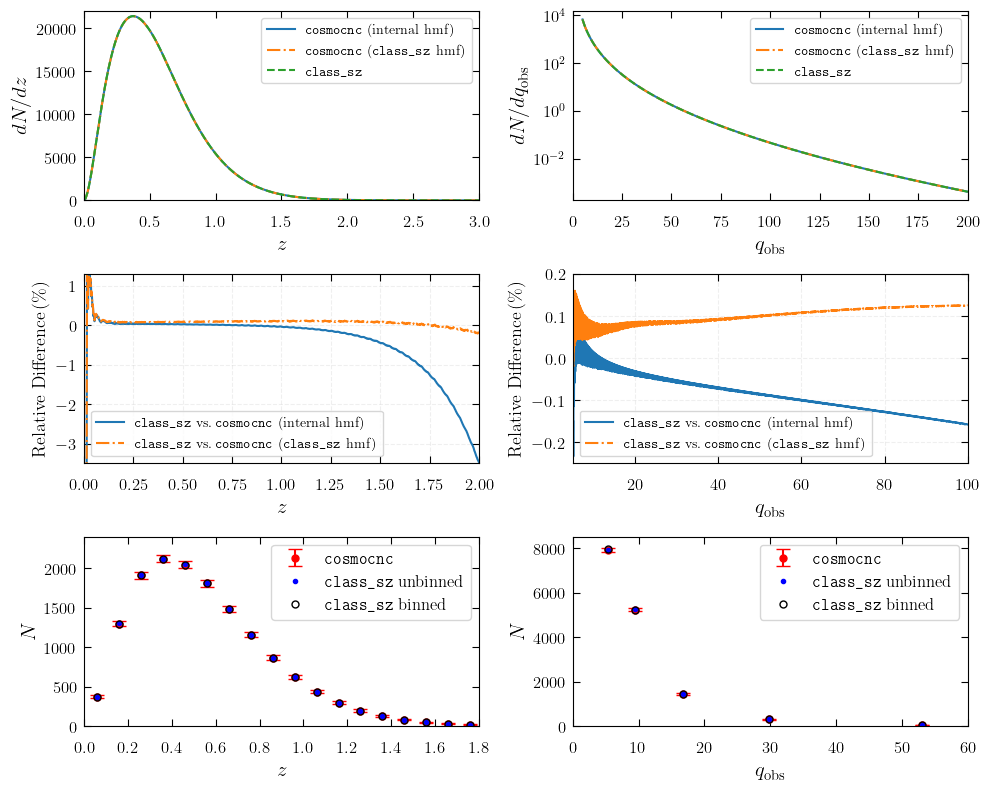

In [32]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(3,2)
axs = gs.subplots()

color_lines = "k"

ax = axs[0,0] 
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.plot(cnc_zs,dndz,label=r"$\mathrm{\texttt{cosmocnc}\,\,(internal\,\,hmf)}$")
ax.plot(cnc_zs_class_sz_hmf,dndz_class_sz_hmf,label=r"$\mathrm{\texttt{cosmocnc}\,\,(\texttt{class\_sz}\,\,hmf)}$",ls='-.')
ax.plot(z_arr,Nz,label=r'$\texttt{class\_sz}$',ls='--')
ax.set_xlabel(r"$z$", fontsize=15)
ax.set_ylabel(r"$dN/dz$", fontsize=15)
ax.legend(fontsize=10,frameon=True)
ax.set_xlim(0,3)
ax.set_ylim(0,22000)

ax = axs[0,1] 
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.set_xlabel(r"$q_\mathrm{obs}$", fontsize=15)
ax.plot(cnc_qs,dndq,label=r"$\mathrm{\texttt{cosmocnc}\,\,(internal\,\,hmf)}$")
ax.plot(cnc_qs_class_sz_hmf,dndq_class_sz_hmf,label=r"$\mathrm{\texttt{cosmocnc}\,\,(\texttt{class\_sz}\,\,hmf)}$",ls='-.')
ax.plot(q_arr,Nq,label=r'$\texttt{class\_sz}$',ls='--')
ax.set_yscale("log")
ax.set_ylabel(r"$dN/dq_\mathrm{obs}$", fontsize=15)
ax.legend(fontsize=10,frameon=True)
ax.set_xlim(0,200)

ax = axs[1,0]
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.set_xlabel(r"$z$", fontsize=15)
ax.set_ylabel(r"$\mathrm{Relative\,\,Difference\,(\%)}$", fontsize=13)
class_sz_nz_interp = np.interp(cnc_zs,z_arr,Nz)
ax.plot(cnc_zs,100.*(class_sz_nz_interp/dndz-1.),label=r"$\mathrm{\texttt{class\_sz}\,\,vs.\,\texttt{cosmocnc}\,\,(internal\,\,hmf)}$")
ax.plot(cnc_zs_class_sz_hmf,100.*(class_sz_nz_interp/dndz_class_sz_hmf-1.),label=r"$\mathrm{\texttt{class\_sz}\,\,vs.\,\texttt{cosmocnc}\,\,(\texttt{class\_sz}\,\,hmf)}$",ls='-.')
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylim(-3.5,1.3)
ax.set_xlim(0.,2.)
ax.legend(fontsize=10,frameon=True)

ax = axs[1,1]
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.set_xlabel(r"$q_\mathrm{obs}$", fontsize=15)
ax.set_ylabel(r"$\mathrm{Relative\,\,Difference\,(\%)}$", fontsize=13)
class_sz_nq_interp = np.interp(cnc_qs,q_arr,Nq)
ax.plot(cnc_qs,100.*(class_sz_nq_interp/dndq-1.),label=r"$\mathrm{\texttt{class\_sz}\,\,vs.\,\texttt{cosmocnc}\,\,(internal\,\,hmf)}$")
ax.plot(cnc_qs_class_sz_hmf,100.*(class_sz_nq_interp/dndq_class_sz_hmf-1.),label=r"$\mathrm{\texttt{class\_sz}\,\,vs.\,\texttt{cosmocnc}\,\,(\texttt{class\_sz}\,\,hmf)}$",ls='-.')
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylim(-0.25,0.2)
ax.set_xlim(5.,100.)
ax.legend(fontsize=10,frameon=True)



ax = axs[2,0]
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.set_xlabel(r"$z$", fontsize=15)
ax.set_ylabel(r"$N$", fontsize=15)




ax.errorbar(np.asarray(z_center),Nz_binned_cnc,yerr=np.sqrt(Nz_binned_cnc),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{\texttt{cosmocnc}}$',
            capsize=5,c='red')


ax.errorbar(np.asarray(z_center),Nz_binned,#yerr=np.sqrt(Nz_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{\texttt{class\_sz}\,\,unbinned}$',
            capsize=5,c='blue')


ax.errorbar(z_center,N_clusters_z_theory,#yerr=np.sqrt(N_clusters_z_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{\texttt{class\_sz}\,\,binned}$',
            capsize=3,
            c='k')

ax.legend(fontsize=12,frameon=True)
ax.set_xlim(0,1.8)
ax.set_ylim(0,2400)

ax = axs[2,1]
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.set_xlabel(r"$q_\mathrm{obs}$", fontsize=15)
ax.set_ylabel(r"$N$", fontsize=15)

ax.errorbar(10**(np.asarray(log10y_center)),Nq_binned_cnc,yerr=np.sqrt(Nq_binned_cnc),
             marker='o',markersize=5.,ls='none',
            label=r'$\mathrm{\texttt{cosmocnc}}$',
             capsize=5,c='r')


ax.errorbar(10**(np.asarray(log10y_center)),Nq_binned,#yerr=np.sqrt(Nq_binned),
             marker='o',markersize=3.,ls='none',
            label=r'$\mathrm{\texttt{class\_sz}\,\,unbinned}$',
             capsize=5,c='blue')


ax.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,#yerr=np.sqrt(N_clusters_y_theory),
            marker='o',
            markersize=5.,
            fillstyle='none',
            ls='none',
            label=r'$\mathrm{\texttt{class\_sz}\,\,binned}$',
             capsize=3,c='k')



ax.set_xlim(0,60)
ax.set_ylim(0,8500)

ax.legend(fontsize=12,frameon=True)
fig.tight_layout()
# plt.savefig("figures/cosmocnc_benchmark_plot.pdf")